In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 한글깨짐 방지
import koreanize_matplotlib

In [3]:
# 데이터 불러오기
path='../data/Paris/listings.csv'
pd.read_csv(path)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84392,1112562855977040914,https://www.airbnb.com/rooms/1112562855977040914,20240316023852,2024-03-19,city scrape,Artists neighbour apt /private yard 10mn Print...,Simplify your life at this peaceful place<br /...,NaN,https://a0.muscache.com/pictures/692d2ee5-8469...,448413156,...,NaN,NaN,NaN,7510164795125,t,15,15,0,0,NaN
84393,1112591023192990750,https://www.airbnb.com/rooms/1112591023192990750,20240316023852,2024-03-18,city scrape,Appartement Tour Eiffel - Porte Dauphine - 2 Pers,Nestled in the heart of the prestigious 16th a...,"A l’orée du bois, le jardin du Ranelagh est un...",https://a0.muscache.com/pictures/miso/Hosting-...,528792181,...,NaN,NaN,NaN,7511612355663,t,6,6,0,0,NaN
84394,1112842648117310093,https://www.airbnb.com/rooms/1112842648117310093,20240316023852,2024-03-19,city scrape,1621: Prime spot in Paris Olympic Games 2024,Discover the allure of our generously proporti...,Embark on an enchanting voyage of discovery th...,https://a0.muscache.com/pictures/prohost-api/H...,530443572,...,NaN,NaN,NaN,7510912350413,t,6,6,0,0,NaN
84395,1112843324939236177,https://www.airbnb.com/rooms/1112843324939236177,20240316023852,2024-03-18,city scrape,Stylish flat in the heart of the city,Welcome to Paris! We are delighted to welcome ...,The 6th arrondissement is home to Saint-Germai...,https://a0.muscache.com/pictures/prohost-api/H...,504268004,...,NaN,NaN,NaN,7510608018554,t,47,47,0,0,NaN


In [4]:
raw = pd.read_csv(path)
dat = raw.copy()
dat.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99


property_type (숙소_유형) 추가
 - room_type 컬럼명 변경 : 숙소_유형 -> 방_유형

In [5]:
# 숙소 관련 테이블
# 02와 변경점 ('host_response_time','host_response_rate','host_acceptance_rate'[ 답변_평균시간, 문의_응답률, 예약_수락률] 삭제)
# >> 이유 : 슈퍼 호스트 기준에 포함되는 속성들이라 중복됨.
df_lodging = dat[['id', 'host_id','listing_url','host_is_superhost','host_total_listings_count','neighbourhood_cleansed', 'room_type',
                  'property_type','accommodates','bathrooms','bedrooms','beds','amenities','price','minimum_nights','maximum_nights']]
df_lodging.head(3)

,id,host_id,listing_url,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,room_type,property_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights
0,3109,3631,https://www.airbnb.com/rooms/3109,f,2.0,Observatoire,Entire home/apt,Entire rental unit,2,1.0,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$250.00,2,30
1,165409,788732,https://www.airbnb.com/rooms/165409,t,1.0,Temple,Entire home/apt,Entire rental unit,2,1.0,0.0,1.0,"[""Lockbox"", ""Wifi"", ""Kitchen"", ""Refrigerator"",...",$140.00,3,365
2,5396,7903,https://www.airbnb.com/rooms/5396,f,3.0,Hôtel-de-Ville,Entire home/apt,Entire rental unit,2,1.0,0.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",$107.00,1,1125


In [6]:
# 컬럼명 변경

df_lodging = df_lodging.rename(columns={
    'id': '숙소_id',
    'host_id': '호스트_id',
    'listing_url':'url',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'property_type':'숙소_특징',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일'
})

df_lodging.head(3)


,숙소_id,호스트_id,url,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,숙소_특징,수용인원수,욕실수,침실수,침대수,편의시설,숙소_가격,최소_숙박일,최대_숙박일
0,3109,3631,https://www.airbnb.com/rooms/3109,f,2.0,Observatoire,Entire home/apt,Entire rental unit,2,1.0,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$250.00,2,30
1,165409,788732,https://www.airbnb.com/rooms/165409,t,1.0,Temple,Entire home/apt,Entire rental unit,2,1.0,0.0,1.0,"[""Lockbox"", ""Wifi"", ""Kitchen"", ""Refrigerator"",...",$140.00,3,365
2,5396,7903,https://www.airbnb.com/rooms/5396,f,3.0,Hôtel-de-Ville,Entire home/apt,Entire rental unit,2,1.0,0.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",$107.00,1,1125


In [7]:
# 리뷰 데이터 테이블
df_review = dat[['number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                'review_scores_location', 'review_scores_value', 'reviews_per_month']]
df_review.head(3)


,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,4,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
1,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69
2,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19


In [8]:
# 컬럼명 변경
df_review = df_review.rename(columns={
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})
df_review.head()


,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,4,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
1,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69
2,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19
3,78,0,4.56,4.74,4.37,4.82,4.79,4.65,4.48,0.51
4,126,3,4.86,4.93,4.82,4.96,4.97,4.94,4.82,0.99


01 전처리 과정 중 통합된 테이블의 필요성을 느낌

In [9]:
# 테이블 합치기
df = pd.concat([df_lodging,df_review], axis=1)
df.head()

,숙소_id,호스트_id,url,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,숙소_특징,수용인원수,욕실수,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,3109,3631,https://www.airbnb.com/rooms/3109,f,2.0,Observatoire,Entire home/apt,Entire rental unit,2,1.0,...,4,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.05
1,165409,788732,https://www.airbnb.com/rooms/165409,t,1.0,Temple,Entire home/apt,Entire rental unit,2,1.0,...,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69
2,5396,7903,https://www.airbnb.com/rooms/5396,f,3.0,Hôtel-de-Ville,Entire home/apt,Entire rental unit,2,1.0,...,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19
3,166370,793032,https://www.airbnb.com/rooms/166370,f,3.0,Entrepôt,Entire home/apt,Entire rental unit,4,1.0,...,78,0,4.56,4.74,4.37,4.82,4.79,4.65,4.48,0.51
4,39948,171483,https://www.airbnb.com/rooms/39948,t,2.0,Bourse,Private room,Private room in guest suite,2,NaN,...,126,3,4.86,4.93,4.82,4.96,4.97,4.94,4.82,0.99


In [10]:
# 정보 확인
df.info()
# total 24 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        84397 non-null  int64  
 1   호스트_id       84397 non-null  int64  
 2   url          84397 non-null  object 
 3   슈퍼호스트        84306 non-null  object 
 4   숙소_수         84390 non-null  float64
 5   숙소_지역        84397 non-null  object 
 6   숙소_유형        84397 non-null  object 
 7   숙소_특징        84397 non-null  object 
 8   수용인원수        84397 non-null  int64  
 9   욕실수          60959 non-null  float64
 10  침실수          77480 non-null  float64
 11  침대수          60828 non-null  float64
 12  편의시설         84397 non-null  object 
 13  숙소_가격        60917 non-null  object 
 14  최소_숙박일       84397 non-null  int64  
 15  최대_숙박일       84397 non-null  int64  
 16  리뷰수          84397 non-null  int64  
 17  30일_리뷰수      84397 non-null  int64  
 18  리뷰점수         58827 non-null  float64
 19  숙소_정

In [11]:
df.isnull().sum()

숙소_id              0
호스트_id             0
url                0
슈퍼호스트             91
숙소_수               7
숙소_지역              0
숙소_유형              0
숙소_특징              0
수용인원수              0
욕실수            23438
침실수             6917
침대수            23569
편의시설               0
숙소_가격          23480
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수           25570
숙소_정확성_리뷰점수    25604
숙소_청결도_리뷰점수    25600
숙소_체크인_리뷰점수    25613
숙소_소통_리뷰점수     25602
숙소_위치_리뷰점수     25610
숙소_가격_리뷰점수     25615
평균_리뷰수         25575
dtype: int64

결측치 제거 확정 <br>
- 슈퍼호스트 null값 (91개) 5%이하
- 리뷰수 = 0인 값--> 리뷰수가 없으면 리뷰점수도 없다
- 숙소수 null값 (7개)
- 리뷰분야 6개 전부 nan값인 컬럼

리뷰수가 0개인 값 제거

In [12]:
df[df['리뷰수'] == 0]

,숙소_id,호스트_id,url,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,숙소_특징,수용인원수,욕실수,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
19,9359,28422,https://www.airbnb.com/rooms/9359,f,4.0,Louvre,Entire home/apt,Entire rental unit,1,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,191531,926484,https://www.airbnb.com/rooms/191531,f,2.0,Temple,Entire home/apt,Entire rental unit,2,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,214596,1107785,https://www.airbnb.com/rooms/214596,f,2.0,Observatoire,Entire home/apt,Entire rental unit,2,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,17316,67192,https://www.airbnb.com/rooms/17316,f,1.0,Entrepôt,Entire home/apt,Entire rental unit,2,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,25450,105570,https://www.airbnb.com/rooms/25450,f,1.0,Entrepôt,Entire home/apt,Entire rental unit,6,2.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84392,1112562855977040914,448413156,https://www.airbnb.com/rooms/1112562855977040914,f,44.0,Opéra,Entire home/apt,Entire rental unit,2,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84393,1112591023192990750,528792181,https://www.airbnb.com/rooms/1112591023192990750,f,14.0,Passy,Entire home/apt,Entire rental unit,2,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84394,1112842648117310093,530443572,https://www.airbnb.com/rooms/1112842648117310093,f,25.0,Opéra,Entire home/apt,Entire rental unit,4,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84395,1112843324939236177,504268004,https://www.airbnb.com/rooms/1112843324939236177,f,65.0,Panthéon,Entire home/apt,Entire rental unit,4,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df[df['리뷰수'] != 0]

In [14]:
df.isnull().sum()

숙소_id              0
호스트_id             0
url                0
슈퍼호스트             77
숙소_수               0
숙소_지역              0
숙소_유형              0
숙소_특징              0
수용인원수              0
욕실수            16979
침실수             5018
침대수            17052
편의시설               0
숙소_가격          17011
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수       34
숙소_청결도_리뷰점수       30
숙소_체크인_리뷰점수       43
숙소_소통_리뷰점수        32
숙소_위치_리뷰점수        40
숙소_가격_리뷰점수        45
평균_리뷰수             0
dtype: int64

In [15]:
df.shape

(58821, 26)

In [16]:
# 리뷰 세부항목 컬럼들이 모두 null값인 행 삭제
df = df.dropna(subset=['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'], how='all', inplace=False)

In [17]:
df.isnull().sum()

숙소_id              0
호스트_id             0
url                0
슈퍼호스트             77
숙소_수               0
숙소_지역              0
숙소_유형              0
숙소_특징              0
수용인원수              0
욕실수            16974
침실수             5015
침대수            17048
편의시설               0
숙소_가격          17007
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수        7
숙소_청결도_리뷰점수        3
숙소_체크인_리뷰점수       16
숙소_소통_리뷰점수         5
숙소_위치_리뷰점수        13
숙소_가격_리뷰점수        18
평균_리뷰수             0
dtype: int64

In [18]:
df.shape

(58794, 26)

슈퍼 호스트 결측치 처리

In [19]:
df['슈퍼호스트'].isnull().sum()

77

In [20]:
# 슈퍼호스트 결측치 개수가 전체 데이터에 몇 퍼센트인지 확인
77 / 84397 * 100 
# 0.09% -> 재거 가능

0.09123547045511096

In [21]:
df = df.dropna(subset=['슈퍼호스트'])

In [22]:
# 다른 null값 확인
df.isnull().sum()

숙소_id              0
호스트_id             0
url                0
슈퍼호스트              0
숙소_수               0
숙소_지역              0
숙소_유형              0
숙소_특징              0
수용인원수              0
욕실수            16956
침실수             5005
침대수            17030
편의시설               0
숙소_가격          16989
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수        7
숙소_청결도_리뷰점수        3
숙소_체크인_리뷰점수       16
숙소_소통_리뷰점수         5
숙소_위치_리뷰점수        13
숙소_가격_리뷰점수        18
평균_리뷰수             0
dtype: int64

In [23]:
df.shape

(58717, 26)

가격 null 값 제거
 - 우선 가격이 있은 데이터만 확인하기 위해서

In [24]:
df['숙소_가격'].value_counts()

숙소_가격
$150.00      1228
$100.00      1168
$120.00      1148
$200.00       935
$90.00        876
             ... 
$833.00         1
$870.00         1
$6,200.00       1
$2,429.00       1
$936.00         1
Name: count, Length: 994, dtype: int64

In [25]:
df = df.dropna(subset=['숙소_가격'])

In [26]:
df.shape

(41728, 26)

In [27]:
df.isnull().sum()

숙소_id           0
호스트_id          0
url             0
슈퍼호스트           0
숙소_수            0
숙소_지역           0
숙소_유형           0
숙소_특징           0
수용인원수           0
욕실수             9
침실수            45
침대수            83
편의시설            0
숙소_가격           0
최소_숙박일          0
최대_숙박일          0
리뷰수             0
30일_리뷰수         0
리뷰점수            0
숙소_정확성_리뷰점수     2
숙소_청결도_리뷰점수     0
숙소_체크인_리뷰점수     4
숙소_소통_리뷰점수      1
숙소_위치_리뷰점수      3
숙소_가격_리뷰점수      7
평균_리뷰수          0
dtype: int64

숙소_가격 이상치 확인

In [28]:
# '$' 기호와 ',' 제거 후 실수(float) 형태로 변환
df.loc[:, '숙소_가격'] = df['숙소_가격'].replace('[$,]', '', regex=True).astype(float)
df['숙소_가격']

0        250.0
1        140.0
2        107.0
3        200.0
6        134.0
         ...  
83487    173.0
83547     79.0
83589    145.0
83687     95.0
84153     60.0
Name: 숙소_가격, Length: 41728, dtype: object

In [29]:
paris_price = df['숙소_가격']

In [30]:
#이상치값
Q1 = paris_price.quantile(0.25)
Q3 = paris_price.quantile(0.75)
Median = paris_price.median()
IQR = Q3 - Q1

#이상치 범위
lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가

#최대,최소값
max_value = paris_price.max()
min_value = paris_price.min()

print('Q1 :',Q1)
print('Q3 :',Q3)
print('IQR :',IQR)
print('lower_bound :', lower_bound)
print('upper_bound :', upper_bound)
print('Median :', Median)
print('max_value :', max_value)
print('min_value :',min_value)

Q1 : 99.0
Q3 : 222.0
IQR : 123.0
lower_bound : -85.5
upper_bound : 406.5
Median : 143.0
max_value : 53239.0
min_value : 8.0


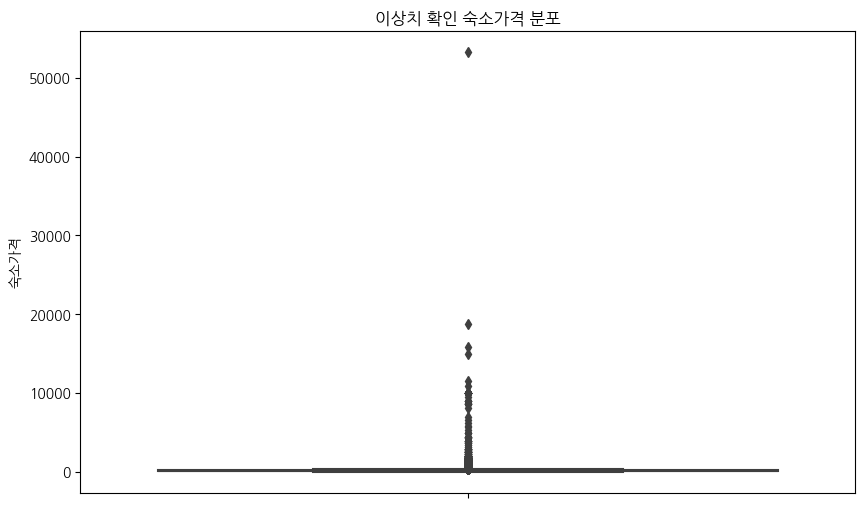

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='숙소_가격')
plt.title('이상치 확인 숙소가격 분포')
plt.ylabel('숙소가격')
plt.show()

In [32]:
# 상한가 이상의 값들 확인
df[df['숙소_가격'] > 406.5].count()

숙소_id          3018
호스트_id         3018
url            3018
슈퍼호스트          3018
숙소_수           3018
숙소_지역          3018
숙소_유형          3018
숙소_특징          3018
수용인원수          3018
욕실수            3017
침실수            3018
침대수            3012
편의시설           3018
숙소_가격          3018
최소_숙박일         3018
최대_숙박일         3018
리뷰수            3018
30일_리뷰수        3018
리뷰점수           3018
숙소_정확성_리뷰점수    3018
숙소_청결도_리뷰점수    3018
숙소_체크인_리뷰점수    3018
숙소_소통_리뷰점수     3018
숙소_위치_리뷰점수     3018
숙소_가격_리뷰점수     3017
평균_리뷰수         3018
dtype: int64

In [33]:
df.shape

(41728, 26)

In [34]:
3018 / 41728 *100
# 7.23% -> 5% 이상이라 제거 불가...

7.232553680981595

### 가격 이상치 처리 부분에 대해서 회의 필요
 - 일단 이후 진행

## 회의 결과 반영
 - 숙소_유형에서 Shared Room과 Hotel Room 제거
 - 제거 이유 : 두 유형의 가격과 욕실,침실,침대수 데이터가 이상하고, 범위를 좁혀 모델링 해보기 위해

In [35]:
df.shape

(41728, 26)

In [36]:
df['숙소_유형'].value_counts()

숙소_유형
Entire home/apt    37413
Private room        3670
Hotel room           445
Shared room          200
Name: count, dtype: int64

In [37]:
print(445 / 58723 * 100)
print(200 / 58723 * 100)
# Hotel room    0.7 %
# Shared room   0.3 %
# 5% 미만 확인

0.757795071777668
0.3405820547315362


In [38]:
# '숙소_유형' 컬럼에서 'Hotel room'과 'Shared room'이 아닌 행들만 필터링
filtered_df = df[~df['숙소_유형'].isin(['Hotel room', 'Shared room'])]

# 필터링된 데이터프레임을 다시 df에 할당
df = filtered_df

In [39]:
df['숙소_유형'].value_counts()

숙소_유형
Entire home/apt    37413
Private room        3670
Name: count, dtype: int64

In [40]:
df.shape

(41083, 26)

In [41]:
df.isnull().sum()

숙소_id           0
호스트_id          0
url             0
슈퍼호스트           0
숙소_수            0
숙소_지역           0
숙소_유형           0
숙소_특징           0
수용인원수           0
욕실수             9
침실수            45
침대수            29
편의시설            0
숙소_가격           0
최소_숙박일          0
최대_숙박일          0
리뷰수             0
30일_리뷰수         0
리뷰점수            0
숙소_정확성_리뷰점수     2
숙소_청결도_리뷰점수     0
숙소_체크인_리뷰점수     4
숙소_소통_리뷰점수      1
숙소_위치_리뷰점수      3
숙소_가격_리뷰점수      7
평균_리뷰수          0
dtype: int64

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 244 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 201 (\N{LATIN CAPITAL LETTER E WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


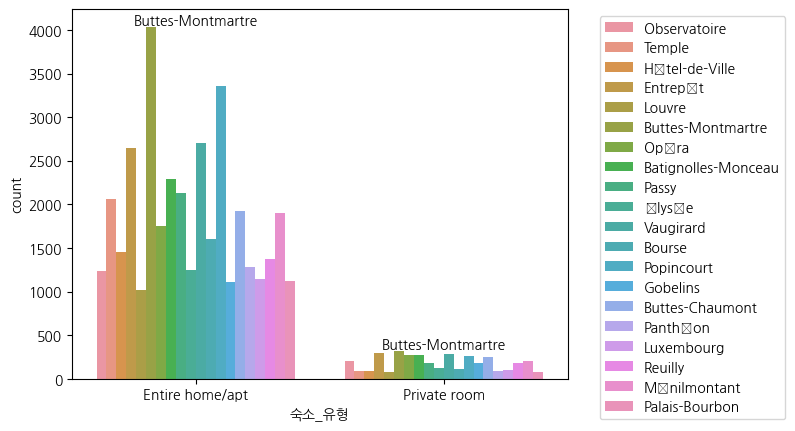

In [42]:
# 숙소_유형에 따른 숙소_지역 빈도수 시각화

sns.countplot(x='숙소_유형', hue='숙소_지역', data=df)

# 각 숙소_유형별 가장 큰 값의 지역명 표기
for i in range(len(df['숙소_유형'].unique())):
    room_type = df['숙소_유형'].unique()[i]
    largest_loc = df[df['숙소_유형'] == room_type]['숙소_지역'].value_counts().idxmax()
    count = df[df['숙소_유형'] == room_type]['숙소_지역'].value_counts().max()
    plt.text(i, count, largest_loc, ha='center', va='bottom')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Buttes-Montmatre라는 지역에 각각의 숙소_유형의 숙소가 가장 많음.

### 숙소_특징 확인(property_type)
 - 세부 항목들 확인 -> 구글 시트 김건우 파트에 파리의 숙소_유형 상세정보 정리해둠.

In [43]:
df['숙소_특징'].unique()

array(['Entire rental unit', 'Private room in rental unit',
       'Entire condo', 'Entire loft', 'Entire townhouse',
       'Private room in townhouse', 'Private room in guest suite',
       'Private room in condo', 'Entire home',
       'Private room in bed and breakfast', 'Entire serviced apartment',
       'Private room in loft', 'Floor', 'Entire guesthouse',
       'Private room in guesthouse', 'Houseboat', 'Private room',
       'Entire place', 'Entire guest suite', 'Private room in tiny home',
       'Private room in home', 'Room in boutique hotel',
       'Private room in earthen home', 'Entire bed and breakfast', 'Boat',
       'Tiny home', 'Private room in villa', 'Room in hotel',
       'Private room in serviced apartment', 'Entire villa',
       'Entire vacation home', 'Room in aparthotel', 'Casa particular',
       'Private room in hostel', 'Private room in casa particular',
       'Private room in boat', 'Camper/RV', 'Entire home/apt',
       'Earthen home', 'Private room

In [44]:
df['숙소_특징'].nunique()

40

In [45]:
df['숙소_특징'].value_counts()

숙소_특징
Entire rental unit                    34376
Private room in rental unit            2169
Entire condo                           1587
Entire loft                             652
Room in hotel                           395
Room in boutique hotel                  331
Private room in bed and breakfast       291
Entire home                             239
Entire serviced apartment               235
Private room in condo                   195
Entire townhouse                        167
Private room in townhouse                48
Private room in home                     42
Room in aparthotel                       40
Private room in hostel                   39
Private room in loft                     39
Entire vacation home                     33
Private room in casa particular          28
Entire place                             24
Private room                             22
Private room in guest suite              22
Entire guesthouse                        17
Private room in guesthouse

In [46]:
# 숙소_유형 값이 20개 이하인 것들 확인
counts = df['숙소_특징'].value_counts()
under_20 = counts[counts <= 20]
print(under_20)

숙소_특징
Entire guesthouse                     17
Private room in guesthouse            16
Entire guest suite                    13
Tiny home                             12
Private room in serviced apartment    12
Entire villa                           7
Private room in boat                   7
Boat                                   6
Entire home/apt                        5
Houseboat                              3
Earthen home                           2
Casa particular                        2
Camper/RV                              1
Private room in villa                  1
Entire bed and breakfast               1
Private room in earthen home           1
Floor                                  1
Private room in tiny home              1
Private room in vacation home          1
Name: count, dtype: int64


이렇게 해도 되나??
 - 기준이 없어서 욕먹을 것 같은데...
 - 차라리 top 10으로 결정하는게 나을듯(숙소 유형이 많은 순 top 10)

In [47]:
# top 10 만 남기기
top_10_types = df['숙소_특징'].value_counts().nlargest(10).index

df = df[df['숙소_특징'].isin(top_10_types)]

In [48]:
df['숙소_특징'].value_counts()

숙소_특징
Entire rental unit                   34376
Private room in rental unit           2169
Entire condo                          1587
Entire loft                            652
Room in hotel                          395
Room in boutique hotel                 331
Private room in bed and breakfast      291
Entire home                            239
Entire serviced apartment              235
Private room in condo                  195
Name: count, dtype: int64

### TOP 10 값 확인
 - Entire rental unit                   : 전체 임대 유닛으로, 집 전체를 단독으로 사용할 수 있는 숙소입니다.
 - Private room in rental unit          : 임대 유닛 내의 개인실로, 공용 공간을 제외한 개인 공간을 사용할 수 있습니다.
 - Entire condo                         : 콘도 전체를 단독으로 사용할 수 있는 숙소입니다.
 - Entire loft                          : 로프트 전체를 단독으로 사용할 수 있는 숙소입니다.
 - Room in hotel                        : 호텔 내의 객실로, 공용 공간을 제외한 개인 공간을 사용할 수 있습니다.
 - Room in boutique hotel               : 부티크 호텔 내의 객실로, 공용 공간을 제외한 개인 공간을 사용할 수 있습니다.
 - Private room in bed and breakfast    : 숙박과 함께 아침 식사를 제공하는 개인실로, 공용 공간을 제외한 개인 공간을 사용할 수 있습니다.
 - Entire home                          : 집 전체를 단독으로 사용할 수 있는 숙소입니다.
 - Entire serviced apartment            : 서비스드 아파트 전체를 단독으로 사용할 수 있는 숙소입니다.
 - Private room in condo                : 콘도 내의 개인실로, 공용 공간을 제외한 개인 공간을 사용할 수 있습니다.

In [49]:
df.shape

(40470, 26)

In [50]:
df.isnull().sum()

숙소_id           0
호스트_id          0
url             0
슈퍼호스트           0
숙소_수            0
숙소_지역           0
숙소_유형           0
숙소_특징           0
수용인원수           0
욕실수             9
침실수            44
침대수            29
편의시설            0
숙소_가격           0
최소_숙박일          0
최대_숙박일          0
리뷰수             0
30일_리뷰수         0
리뷰점수            0
숙소_정확성_리뷰점수     2
숙소_청결도_리뷰점수     0
숙소_체크인_리뷰점수     4
숙소_소통_리뷰점수      1
숙소_위치_리뷰점수      3
숙소_가격_리뷰점수      7
평균_리뷰수          0
dtype: int64

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 244 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 201 (\N{LATIN CAPITAL LETTER E WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


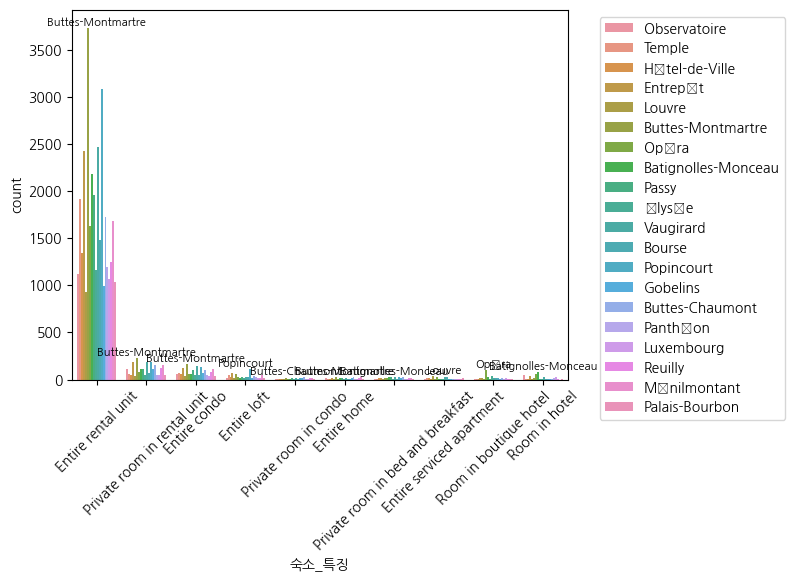

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def column_by_region(df, x_column):
    sns.countplot(x=x_column, hue='숙소_지역', data=df)

    for i in range(len(df[x_column].unique())):
        column_value = df[x_column].unique()[i]
        largest_loc = df[df[x_column] == column_value]['숙소_지역'].value_counts().idxmax()
        count = df[df[x_column] == column_value]['숙소_지역'].value_counts().max()
        plt.text(i, count, largest_loc, ha='center', va='bottom', fontsize=8)

    plt.xticks(rotation=45)  # x축 라벨 45도 회전
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# 함수 호출
column_by_region(df, '숙소_특징')


초기값<br>
84397

리뷰수 0 제거 후 # 25,576개 제거<br>
58821

리뷰 세부항목 컬럼들이 모두 null값인 행 삭제 # 27개 제거<br>
58794

슈퍼호스트 결측치 처리 후 # 77개 제거<br>
58,717

숙소_가격 결측치 처리 후 # 16989개 제거<br>
41728

숙소_유형 전처리 후 # 645개 제거<br>
41083

--------------------------------------
-- 여기 대기(top 10 )<br>
숙소_특징 전처리 후 # 613개 제거
40470

##### 욕실수, 침실수, 침대수 결측치 처리

In [52]:
# 욕실수가 null값만 확인
df[df['욕실수'].isnull()][['호스트_id','url','숙소_특징','숙소_유형','수용_인원수']]

,호스트_id,url,숙소_특징,숙소_유형,수용인원수
145,1293609,https://www.airbnb.com/rooms/246647,Entire rental unit,Entire home/apt,2
204,1447154,https://www.airbnb.com/rooms/277077,Entire rental unit,Entire home/apt,2
523,2584126,https://www.airbnb.com/rooms/584317,Entire rental unit,Entire home/apt,2
675,3523050,https://www.airbnb.com/rooms/757474,Private room in rental unit,Private room,1
968,4459453,https://www.airbnb.com/rooms/854013,Entire rental unit,Entire home/apt,1
1270,6583611,https://www.airbnb.com/rooms/1205304,Entire rental unit,Entire home/apt,2
54048,28098248,https://www.airbnb.com/rooms/877616019370115705,Private room in rental unit,Private room,1
72186,26481018,https://www.airbnb.com/rooms/1042748828848366723,Private room in rental unit,Private room,2
81603,563466213,https://www.airbnb.com/rooms/1097265150575988890,Private room in rental unit,Private room,2


145 -> 리뷰에 각 층에 화장실과 샤워기가 있다는 말이 있음.<br>
204, 523, 1270 -> 사진에 욕실 나와있음.<br>
675 -> 샤워부스 따로, 변기 따로 있는 사진이 있음.<br>
968 -> 샤워브스 사진이 있고, 리뷰에 관련 내용이 있음.(근데 화장실(변기)에 대한 부분은 아예 못 찾음)<br>
54048 -> 설명에는 욕실 없음, 사진에는 샤워부스,세면대 공간 하나 변기 공간 따로 하나 있음, 리뷰에 공용 공간(주방 및 욕실)이 있음.<br>
72186 -> 설명에는 욕실 없음, 사진에는 욕조, 세면대만 있음.(화장실(변기)에 대한 부분은 아예 못 찾음)<br>
81603 -> 설명에는 전용 욕실이라고 적혀있음.(사진,리뷰에 단서 X)<br>

In [53]:
# '욕실수'가 null인 행들 중 '숙소_유형'과 '숙소_특징' 열의 value_counts() 출력
print("숙소_유형의 value_counts():")
print(df[df['욕실수'].isnull()]['숙소_유형'].value_counts())

숙소_유형의 value_counts():
숙소_유형
Entire home/apt    5
Private room       4
Name: count, dtype: int64


In [54]:
print("\n숙소_특징의 value_counts():")
print(df[df['욕실수'].isnull()]['숙소_특징'].value_counts())


숙소_특징의 value_counts():
숙소_특징
Entire rental unit             5
Private room in rental unit    4
Name: count, dtype: int64


In [55]:
# 욕실수가 null이 아닌 값만 확인
df[df['욕실수'].notnull()][['url','숙소_유형','숙소_특징','수용_인원수','욕실수']]

,url,숙소_유형,숙소_특징,수용인원수,욕실수
0,https://www.airbnb.com/rooms/3109,Entire home/apt,Entire rental unit,2,1.0
1,https://www.airbnb.com/rooms/165409,Entire home/apt,Entire rental unit,2,1.0
2,https://www.airbnb.com/rooms/5396,Entire home/apt,Entire rental unit,2,1.0
3,https://www.airbnb.com/rooms/166370,Entire home/apt,Entire rental unit,4,1.0
6,https://www.airbnb.com/rooms/7397,Entire home/apt,Entire rental unit,4,1.0
...,...,...,...,...,...
83487,https://www.airbnb.com/rooms/1107817934127553788,Entire home/apt,Entire rental unit,4,1.0
83547,https://www.airbnb.com/rooms/1107872133955829208,Entire home/apt,Entire rental unit,4,1.0
83589,https://www.airbnb.com/rooms/1108741370485532713,Entire home/apt,Entire rental unit,2,1.0
83687,https://www.airbnb.com/rooms/1109220943409848089,Entire home/apt,Entire rental unit,2,1.0


욕실수와 숙소_유형, 숙소_특징, 수용인원수 간의 상관계수 확인

In [56]:
condition = df[df['욕실수'].notnull()][['숙소_유형','숙소_특징','수용_인원수','욕실수']]
condition_encoded = pd.get_dummies(condition)

In [57]:
condition_encoded.corr()

,수용인원수,욕실수,숙소_유형_Entire home/apt,숙소_유형_Private room,숙소_특징_Entire condo,숙소_특징_Entire home,숙소_특징_Entire loft,숙소_특징_Entire rental unit,숙소_특징_Entire serviced apartment,숙소_특징_Private room in bed and breakfast,숙소_특징_Private room in condo,숙소_특징_Private room in rental unit,숙소_특징_Room in boutique hotel,숙소_특징_Room in hotel
수용인원수,1.000000,0.513653,0.201752,-0.201752,0.005245,0.097971,0.063535,0.103918,0.027999,-0.063589,-0.040011,-0.166122,-0.044732,-0.063602
욕실수,0.513653,1.000000,0.044268,-0.044268,0.006615,0.102690,0.049201,-0.011022,0.010786,-0.014146,-0.005296,-0.039219,0.009466,-0.027372
숙소_유형_Entire home/apt,0.201752,0.044268,1.000000,-1.000000,0.060962,0.023258,0.038613,0.716786,0.023061,-0.282094,-0.230646,-0.788043,-0.300015,-0.329085
숙소_유형_Private room,-0.201752,-0.044268,-1.000000,1.000000,-0.060962,-0.023258,-0.038613,-0.716786,-0.023061,0.282094,0.230646,0.788043,0.300015,0.329085
숙소_특징_Entire condo,0.005245,0.006615,0.060962,-0.060962,1.000000,-0.015575,-0.025858,-0.480006,-0.015443,-0.017197,-0.014061,-0.048041,-0.018350,-0.020062
숙소_특징_Entire home,0.097971,0.102690,0.023258,-0.023258,-0.015575,1.000000,-0.009865,-0.183128,-0.005892,-0.006561,-0.005364,-0.018328,-0.007001,-0.007654
숙소_특징_Entire loft,0.063535,0.049201,0.038613,-0.038613,-0.025858,-0.009865,1.000000,-0.304033,-0.009782,-0.010893,-0.008906,-0.030429,-0.011623,-0.012707
숙소_특징_Entire rental unit,0.103918,-0.011022,0.716786,-0.716786,-0.480006,-0.183128,-0.304033,1.000000,-0.181580,-0.202201,-0.165324,-0.564859,-0.215758,-0.235884
숙소_특징_Entire serviced apartment,0.027999,0.010786,0.023061,-0.023061,-0.015443,-0.005892,-0.009782,-0.181580,1.000000,-0.006505,-0.005319,-0.018173,-0.006942,-0.007589
숙소_특징_Private room in bed and breakfast,-0.063589,-0.014146,-0.282094,0.282094,-0.017197,-0.006561,-0.010893,-0.202201,-0.006505,1.000000,-0.005923,-0.020237,-0.007730,-0.008451


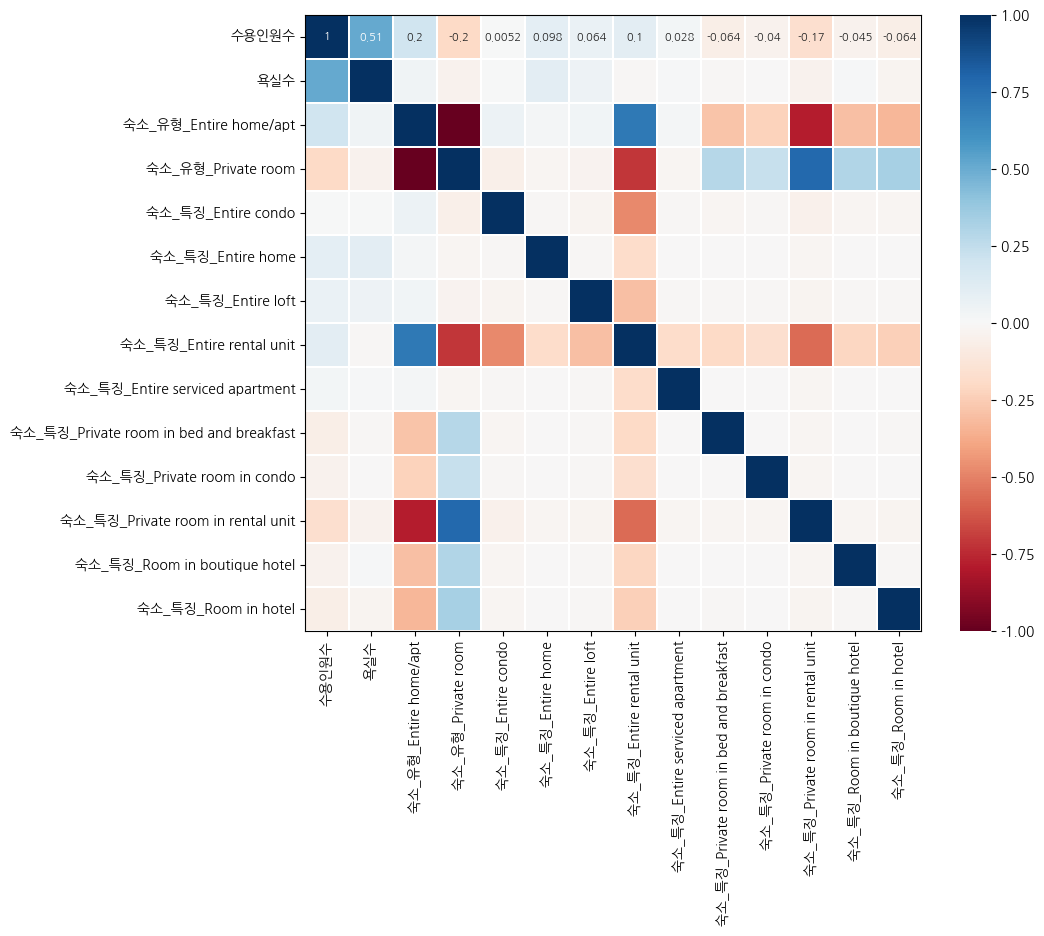

In [58]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(condition_encoded.astype('float').corr(), linewidths=0.1, vmax=1.0,
                      square=True, cmap=colormap, linecolor='white', annot=True,
                      annot_kws={"size": 8})

# 모든 숫자 표시
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


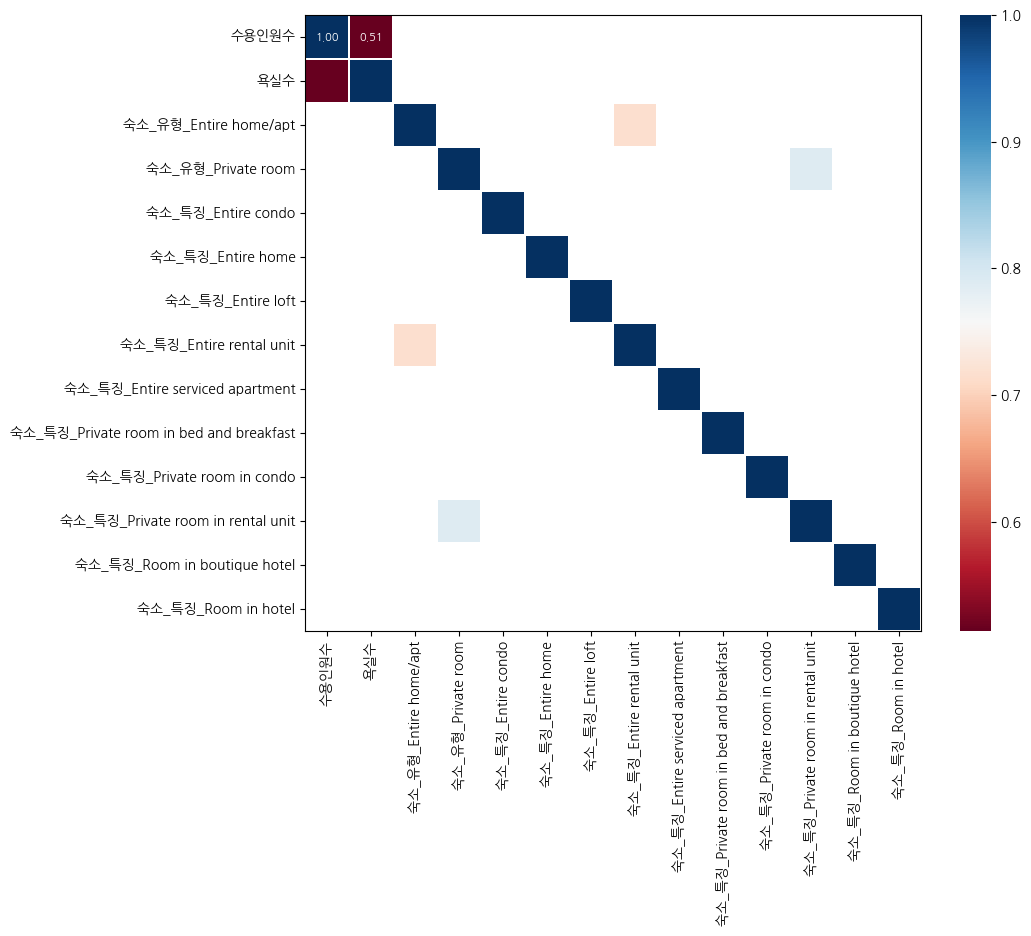

In [59]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10, 8))
corr = condition_encoded.astype('float').corr()
corr = corr[corr >= 0.4]  # 0.4 이상인 값만 남기고 나머지는 NaN으로 변경
heatmap = sns.heatmap(corr, linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 8})

# 숫자 표시
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

# 숫자 포맷팅
for text in heatmap.texts:
    if text.get_text() != '--':  # NaN 값은 처리하지 않음
        value = float(text.get_text())
        text.set_text('' if value < 0.4 else f'{value:.2f}')

plt.show()

0.4이상인 값:
 - 수용인원수-욕실수 : 0.51
 - 숙소유형(room in boutique hotel) - 숙소_특징(private room)
 - 숙소유형(entire rental unit) - 숙소_특징(entire home/apt)

욕실수와 수용인원수의 상관관계를 확인
 - 뭐 당연한이야기지만, 일단 데이터로 확인
 - 나머지 두개의 상관계수는 굳이? 라는 느낌이지만 일단 킵

욕실수 결측치 처리 1
 - 숙소_유형별, 방_유형별, 수용인원수별 평균값 대체